# Exploratory analysis of wind turbine data

In [5]:
import sys
from pathlib import Path

import pandas as pd

In [15]:
# Set max number of columns to display; default 20
pd.options.display.max_columns = 30

In [2]:
sys.executable

'/opt/miniconda3/envs/course_project/bin/python'

In [3]:
sys.version

'3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:39:40) [Clang 15.0.7 ]'

In [36]:
# Get cwd path
cwd_path = Path.cwd()
cwd_path.parent

PosixPath('/Users/brand/my_code/meteoviz/course_project')

### Read in data 

In [10]:
df = pd.read_csv(cwd_path.parent / 'data/WindTurbinesGermany.csv', sep=',')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34484 entries, 0 to 34483
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Land                                34484 non-null  object 
 1   Bundesland                          34484 non-null  object 
 2   Landkreis                           32700 non-null  object 
 3   Postleitzahl                        32700 non-null  float64
 4   Ort                                 32700 non-null  object 
 5   Laengengrad                         33589 non-null  float64
 6   Breitengrad                         33589 non-null  float64
 7   Registrierungsdatum                 34484 non-null  object 
 8   Inbetriebnahmedatum                 32020 non-null  object 
 9   EinheitBetriebsstatus               34484 non-null  object 
 10  Energietraeger                      34484 non-null  object 
 11  Bruttoleistung                      34484

In [23]:
df.isna().sum()

Land                                      0
Bundesland                                0
Landkreis                              1784
Postleitzahl                           1784
Ort                                    1784
Laengengrad                             895
Breitengrad                             895
Registrierungsdatum                       0
Inbetriebnahmedatum                    2464
EinheitBetriebsstatus                     0
Energietraeger                            0
Bruttoleistung                            0
Nettonennleistung                         0
AnschlussAnHoechstOderHochSpannung     9853
Einspeisungsart                         714
NameWindpark                            810
Lage                                      0
Hersteller                              449
Technologie                               0
Typenbezeichnung                        464
Nabenhoehe                              853
Rotordurchmesser                        453
Rotorblattenteisungssystem      

In [37]:
df.head(2)

,Land,Bundesland,Landkreis,Postleitzahl,Ort,Laengengrad,Breitengrad,Registrierungsdatum,Inbetriebnahmedatum,EinheitBetriebsstatus,Energietraeger,Bruttoleistung,Nettonennleistung,AnschlussAnHoechstOderHochSpannung,Einspeisungsart,NameWindpark,Lage,Hersteller,Technologie,Typenbezeichnung,Nabenhoehe,Rotordurchmesser,Rotorblattenteisungssystem,GeplantesInbetriebnahmedatum,Seelage,ClusterNordsee,Wassertiefe,Kuestenentfernung,ClusterOstsee
0,Deutschland,Hessen,Werra-Meißner-Kreis,34298.0,Helsa,9.739374,51.270068,2019-02-13,2017-09-01,In Betrieb,Wind,3000.0,3000.0,1.0,Volleinspeisung,Windpark Kreuzstein,Windkraft an Land,ENERCON GmbH,Horizontalläufer,E-115,149.08,115.71,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Deutschland,Schleswig-Holstein,Segeberg,23824.0,Damsdorf,10.299400,54.073831,2019-02-01,2017-09-28,In Betrieb,Wind,3000.0,3000.0,0.0,Volleinspeisung,Damsdorf,Windkraft an Land,ENERCON GmbH,Horizontalläufer,E-115,135.40,115.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dates

In [26]:
# Convert date features to datetime objects
df['Registrierungsdatum'] = pd.to_datetime(df['Registrierungsdatum'])
df['Inbetriebnahmedatum'] = pd.to_datetime(df['Inbetriebnahmedatum'])

#### Date range of Registrierungsdatum is Jan 2019 to May 2023

In [33]:
# df.sort_values(by='Registrierungsdatum', ascending=True)

In [34]:
print(df['Registrierungsdatum'].min())
print(df['Registrierungsdatum'].max())

2019-01-31 00:00:00
2023-05-26 00:00:00


In [60]:
# Resample on datetime
# Alternative using groupby: df.groupby(pd.Grouper(freq='W', key='Registrierungsdatum'))['Registrierungsdatum'].count()
df.resample('A', on='Registrierungsdatum')['Registrierungsdatum'].count()

Registrierungsdatum
2019-12-31    13176
2020-12-31    14736
2021-12-31     3986
2022-12-31     1633
2023-12-31      953
Freq: A-DEC, Name: Registrierungsdatum, dtype: int64

<Axes: xlabel='Registrierungsdatum'>

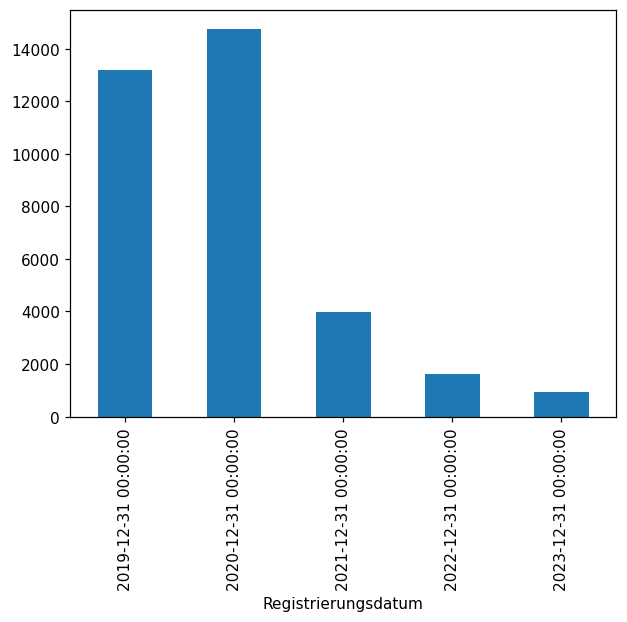

In [66]:
df.resample('A', on='Registrierungsdatum')['Registrierungsdatum'].count().plot.bar()

#### Date range of Inbetriebnahmedatum is 1960 to 2023
- Process for registering 

In [35]:
print(df['Inbetriebnahmedatum'].min())
print(df['Inbetriebnahmedatum'].max())

1960-04-02 00:00:00
2023-05-26 00:00:00


<Axes: title={'center': 'Test'}, xlabel='Inbetriebnahmedatum'>

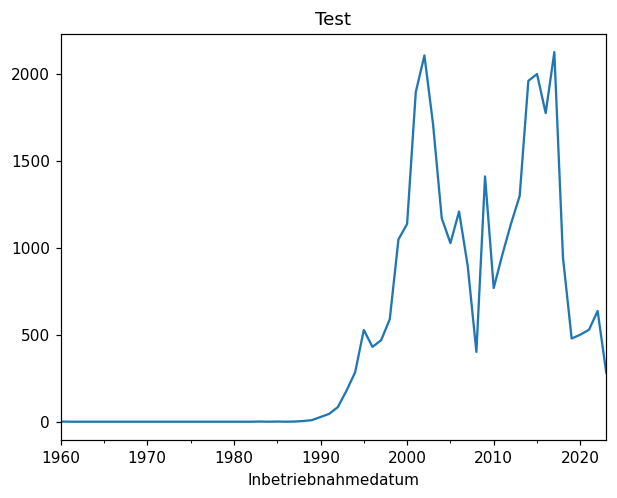

In [69]:
df.resample('A', on='Inbetriebnahmedatum')['Inbetriebnahmedatum'].count().plot(title='Test')

### Unique value counts

In [19]:
df['Energietraeger'].value_counts()

Energietraeger
Wind    34484
Name: count, dtype: int64

In [20]:
df['Technologie'].value_counts()

Technologie
Horizontalläufer    34027
Vertikalläufer        457
Name: count, dtype: int64

In [21]:
df['EinheitBetriebsstatus'].value_counts()

EinheitBetriebsstatus
In Betrieb                   30983
In Planung                    2464
Endgültig stillgelegt          999
Vorübergehend stillgelegt       38
Name: count, dtype: int64

In [40]:
# Land vs offshore
df['Lage'].value_counts()

Lage
Windkraft an Land    32700
Windkraft auf See     1784
Name: count, dtype: int64

In [41]:
df['AnschlussAnHoechstOderHochSpannung'].value_counts()

AnschlussAnHoechstOderHochSpannung
0.0    15554
1.0     9077
Name: count, dtype: int64

In [43]:
df['Hersteller'].value_counts()

Hersteller
ENERCON GmbH                        13057
Vestas Deutschland GmbH              6600
Nordex Energy GmbH                   2228
Siemens Wind Power GmbH & Co. KG     1531
Senvion Deutschland GmbH             1495
                                    ...  
Svit Vitru                              1
ESPV-TEC GmbH & Co. KG                  1
SMA Solar Technology AG                 1
WES IBS GmbH                            1
SB Energy UK Ltd.                       1
Name: count, Length: 115, dtype: int64

### Summary statistics of numerical continuous features
- Looks like I'll want wind speed data for height 100m

In [50]:
df[['Bruttoleistung', 'Nettonennleistung', 'Nabenhoehe', 'Rotordurchmesser']].describe()

,Bruttoleistung,Nettonennleistung,Nabenhoehe,Rotordurchmesser
count,34484.000000,34484.000000,33631.000000,34031.000000
mean,2370.309200,2370.309200,98.725831,87.096264
std,1681.910702,1681.910702,34.785787,35.863944
min,0.120000,0.120000,0.360000,0.300000
25%,1500.000000,1500.000000,70.000000,66.000000
50%,2000.000000,2000.000000,98.000000,82.000000
75%,3050.000000,3050.000000,134.000000,115.000000
max,20000.000000,20000.000000,200.000000,200.000000


### Filtering ideas
- Keep only land-based turbines
- Remove turbines that are not in operation (shame dates aren't given)
- ?